<a href="https://colab.research.google.com/github/legendary-idiot/ARIMA_Model/blob/main/NOx_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Install Prophet and Dependencies**

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# **2. Data Import and Visualize**

In [ ]:
df = pd.read_csv('/content/Pollutant_Data/Pollutant Data.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1095 non-null   object 
 1   SO2     1095 non-null   float64
 2   NO      1095 non-null   float64
 3   NO2     1095 non-null   float64
 4   NOx     1095 non-null   float64
 5   O3      1095 non-null   float64
 6   PM2.5   1095 non-null   float64
 7   PM10    1095 non-null   float64
dtypes: float64(7), object(1)
memory usage: 68.6+ KB


In [ ]:
df.head()

,Date,SO2,NO,NO2,NOx,O3,PM2.5,PM10
0,1-Jan-21,2.0590,31.3940,19.0900,50.4840,11.7230,27.3530,112.4580
1,2-Jan-21,2.5045,38.0809,32.8662,72.0315,11.5146,51.8938,178.5706
2,3-Jan-21,2.9500,46.1920,56.5840,102.7760,11.3100,98.4525,283.5500
3,4-Jan-21,2.8667,35.8671,27.4246,58.8083,27.7379,71.7288,197.7121
4,5-Jan-21,2.9475,47.4900,29.2929,74.8042,22.7471,86.1671,195.8113


In [ ]:
df.tail()

,Date,SO2,NO,NO2,NOx,O3,PM2.5,PM10
1090,27-Dec-23,7.4313,32.0225,8.9050,38.7013,2.5577,172.9479,233.7886
1091,28-Dec-23,5.4300,10.2100,17.9800,28.1900,2.5225,243.0800,311.2325
1092,29-Dec-23,5.1629,14.5946,10.6950,25.2896,2.5363,141.5100,228.3850
1093,30-Dec-23,4.8596,4.9267,8.9063,13.8329,2.5204,79.0046,150.1833
1094,31-Dec-23,4.6693,12.3886,9.1957,21.5843,2.5307,92.4479,147.1693


# **3. Select Data to Predict**

In [ ]:
df=df[["Date","NOx"]]
df.head()

,Date,NOx
0,1-Jan-21,50.4840
1,2-Jan-21,72.0315
2,3-Jan-21,102.7760
3,4-Jan-21,58.8083
4,5-Jan-21,74.8042


**Change Column Names for FBProphet**

In [ ]:
df.columns = ['ds','y']

**Convert Date Format to YY-MM-DD**

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
1090,2023-12-27,38.7013
1091,2023-12-28,28.1900
1092,2023-12-29,25.2896
1093,2023-12-30,13.8329
1094,2023-12-31,21.5843


# **4. Start Making Predictions**

In [ ]:
m = Prophet(daily_seasonality=True)
m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3hsp7866/qho59sct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3hsp7866/jqy3nv8q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71272', 'data', 'file=/tmp/tmp3hsp7866/qho59sct.json', 'init=/tmp/tmp3hsp7866/jqy3nv8q.json', 'output', 'file=/tmp/tmp3hsp7866/prophet_modelltrp93w8/prophet_model-20240418210424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:04:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:04:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Predictions for 1 Year (365 Days)**

In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1455,2024-12-26
1456,2024-12-27
1457,2024-12-28
1458,2024-12-29
1459,2024-12-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2021-01-01,72.199576,59.256862,84.354051
1,2021-01-02,73.325905,58.985670,87.734527
2,2021-01-03,73.032933,60.472939,86.559531
3,2021-01-04,74.193895,62.085452,87.210481
4,2021-01-05,75.246469,62.437226,88.112713


# **5. Plot the Predicted Data**

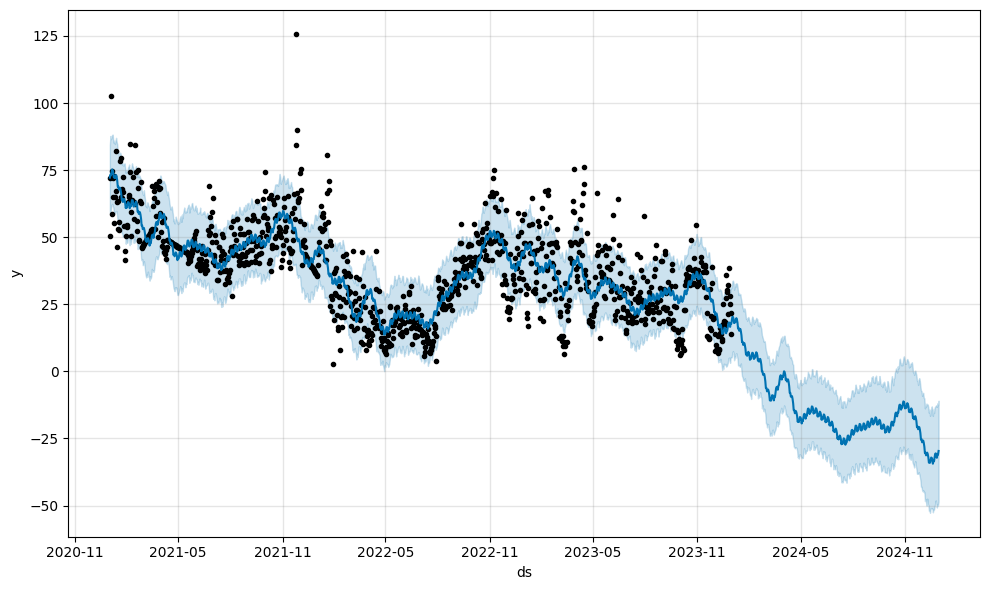

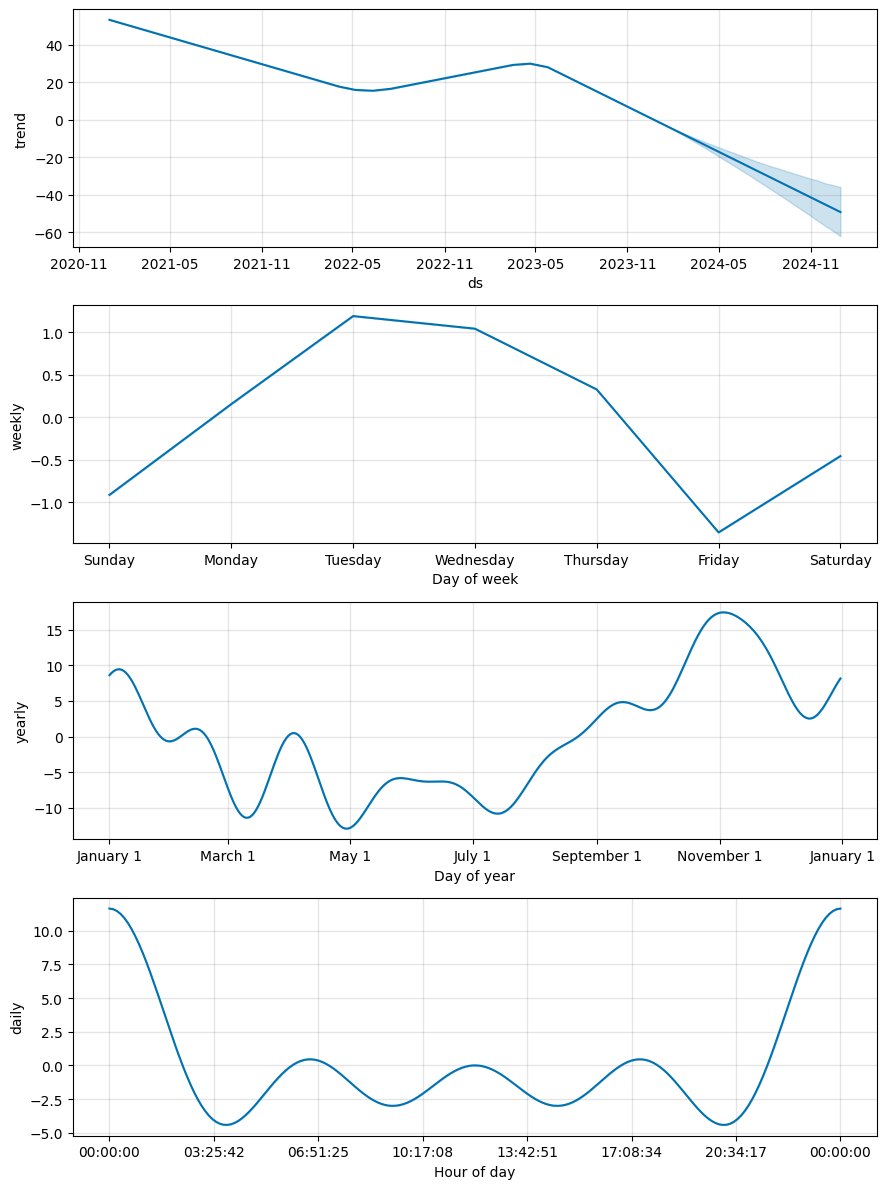

In [ ]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

**Interactive Plot**

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

# **6. Export the Predicted Data**

In [ ]:
export = forecast[["ds", "yhat"]]
export.head()

,ds,yhat
0,2021-01-01,72.199576
1,2021-01-02,73.325905
2,2021-01-03,73.032933
3,2021-01-04,74.193895
4,2021-01-05,75.246469


In [ ]:
export.to_csv('/content/Pollutant_Data/Predicted_NOx.csv')